In [2]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 KB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.8/112.8 KB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 KB 17.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 98.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 KB 22.4 MB/s eta 0:00:00
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting un

In [3]:
!pip install hurst

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[*********************100%***********************]  1 of 1 completed


/usr/local/lib/python3.9/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


Hurst Exponent Trading Strategy Performance Metrics:
Sharpe Ratio: 1.02
Sortino Ratio: 1.33
Return on Investment: 7.13%
Max Drawdown: 18590.78%
Buy-and-Hold Strategy Performance Metrics:
Sharpe Ratio: 0.90
Sortino Ratio: 1.17
Return on Investment: 6.45%
Max Drawdown: 20757.22%


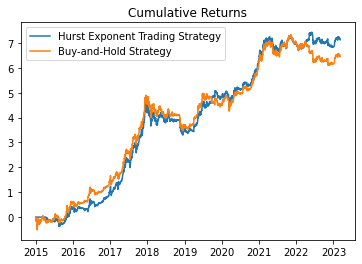

In [41]:
# Import necessary libraries
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from hurst import compute_Hc, random_walk

# Retrieve data from yfinance API
symbol = 'BTC-USD'
start_date = '2015-01-01'
end_date = '2023-03-09'
df = yf.download(symbol, start=start_date, end=end_date, interval='1d')

# Set the number of days between Hurst exponent calculations
hurst_period = 100

# Initialize the trading signal to zero
df['signal'] = 0

# Loop through the data and calculate the Hurst exponent every hurst_period days
for i in range(0, len(df)):
   if i >= hurst_period:
        # Calculate the Hurst exponent for the current period
        H, c, data = compute_Hc(df['Close'].iloc[i-hurst_period+1:i+1], kind='price', simplified=True)
        # Determine the trading signal based on the Hurst exponent
        signal = np.where(H > 0.5, 1, -1)
        # Set the trading signal for the current period
        df['signal'].iloc[i] = signal
# Calculate the daily returns of the asset
df['returns'] = df['Close'].pct_change()

# Calculate the strategy returns
df['strategy_returns'] = df['signal'] * df['returns']

# Calculate the cumulative strategy returns
df['cumulative_strategy_returns'] = df['strategy_returns'].cumsum()

# Calculate the buy-and-hold returns
df['buy_and_hold_returns'] = df['returns'].cumsum()

# Calculate performance metrics for the trading strategy
sharpe_ratio = df['strategy_returns'].mean() / df['strategy_returns'].std() * np.sqrt(252)
sortino_ratio = df['strategy_returns'].mean() / df[df['strategy_returns'] < 0]['strategy_returns'].std() * np.sqrt(252)
roi = df['cumulative_strategy_returns'][-1]*100
max_drawdown = ((df['cumulative_strategy_returns'].cummax() - df['cumulative_strategy_returns']) / df['cumulative_strategy_returns'].cummax()).max() * 100

# Calculate performance metrics for the buy-and-hold strategy
buy_and_hold_sharpe_ratio = df['returns'].mean() / df['returns'].std() * np.sqrt(252)
buy_and_hold_sortino_ratio = df['returns'].mean() / df[df['returns'] < 0]['returns'].std() * np.sqrt(252)
buy_and_hold_roi = df['buy_and_hold_returns'][-1]*100
buy_and_hold_max_drawdown = ((df['buy_and_hold_returns'].cummax() - df['buy_and_hold_returns']) / df['buy_and_hold_returns'].cummax()).max() * 100

# Print performance metrics for the trading strategy
print('Hurst Exponent Trading Strategy Performance Metrics:')
print(f'Sharpe Ratio: {sharpe_ratio:.2f}')
print(f'Sortino Ratio: {sortino_ratio:.2f}')
print(f'Return on Investment: {roi:.2f}%')
print(f'Max Drawdown: {max_drawdown:.2f}%')

print('Buy-and-Hold Strategy Performance Metrics:')
print(f'Sharpe Ratio: {buy_and_hold_sharpe_ratio:.2f}')
print(f'Sortino Ratio: {buy_and_hold_sortino_ratio:.2f}')
print(f'Return on Investment: {buy_and_hold_roi:.2f}%')
print(f'Max Drawdown: {buy_and_hold_max_drawdown:.2f}%')

plt.plot(df.index, df['cumulative_strategy_returns'], label='Hurst Exponent Trading Strategy')
plt.plot(df.index, df['buy_and_hold_returns'], label='Buy-and-Hold Strategy')
plt.legend()
plt.title('Cumulative Returns')
plt.show()


[*********************100%***********************]  1 of 1 completed


/usr/local/lib/python3.9/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


Hurst Exponent Trading Strategy Performance Metrics:
Sharpe Ratio: 0.35
Sortino Ratio: 0.47
Return on Investment: 3.66%
Max Drawdown: inf%
Buy-and-Hold Strategy Performance Metrics:
Sharpe Ratio: 0.32
Sortino Ratio: 0.43
Return on Investment: 3.42%
Max Drawdown: 102.41%


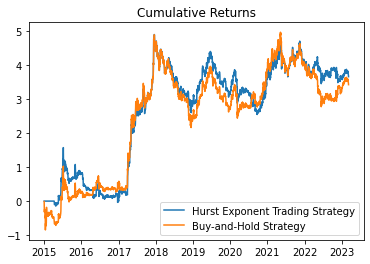

In [42]:
# Import necessary libraries
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from hurst import compute_Hc, random_walk

# Retrieve data from yfinance API
symbol = 'LTC-USD'
start_date = '2015-01-01'
end_date = '2023-03-09'
df = yf.download(symbol, start=start_date, end=end_date, interval='1d')

# Set the number of days between Hurst exponent calculations
hurst_period = 100

# Initialize the trading signal to zero
df['signal'] = 0

# Loop through the data and calculate the Hurst exponent every hurst_period days
for i in range(0, len(df)):
   if i >= hurst_period:
        # Calculate the Hurst exponent for the current period
        H, c, data = compute_Hc(df['Close'].iloc[i-hurst_period+1:i+1], kind='price', simplified=True)
        # Determine the trading signal based on the Hurst exponent
        signal = np.where(H > 0.5, 1, -1)
        # Set the trading signal for the current period
        df['signal'].iloc[i] = signal
# Calculate the daily returns of the asset
df['returns'] = np.log(df['Close'] / df['Close'].shift(1))

# Calculate the strategy returns
df['strategy_returns'] = df['signal'] * df['returns']

# Calculate the cumulative strategy returns
df['cumulative_strategy_returns'] = df['strategy_returns'].cumsum()

# Calculate the buy-and-hold returns
df['buy_and_hold_returns'] = df['returns'].cumsum()

# Calculate performance metrics for the trading strategy
sharpe_ratio = df['strategy_returns'].mean() / df['strategy_returns'].std() * np.sqrt(252)
sortino_ratio = df['strategy_returns'].mean() / df[df['strategy_returns'] < 0]['strategy_returns'].std() * np.sqrt(252)
roi = df['cumulative_strategy_returns'][-1]*100
max_drawdown = ((df['cumulative_strategy_returns'].cummax() - df['cumulative_strategy_returns']) / df['cumulative_strategy_returns'].cummax()).max() * 100

# Calculate performance metrics for the buy-and-hold strategy
buy_and_hold_sharpe_ratio = df['returns'].mean() / df['returns'].std() * np.sqrt(252)
buy_and_hold_sortino_ratio = df['returns'].mean() / df[df['returns'] < 0]['returns'].std() * np.sqrt(252)
buy_and_hold_roi = df['buy_and_hold_returns'][-1]*100
buy_and_hold_max_drawdown = ((df['buy_and_hold_returns'].cummax() - df['buy_and_hold_returns']) / df['buy_and_hold_returns'].cummax()).max() * 100

# Print performance metrics for the trading strategy
print('Hurst Exponent Trading Strategy Performance Metrics:')
print(f'Sharpe Ratio: {sharpe_ratio:.2f}')
print(f'Sortino Ratio: {sortino_ratio:.2f}')
print(f'Return on Investment: {roi:.2f}%')
print(f'Max Drawdown: {max_drawdown:.2f}%')

print('Buy-and-Hold Strategy Performance Metrics:')
print(f'Sharpe Ratio: {buy_and_hold_sharpe_ratio:.2f}')
print(f'Sortino Ratio: {buy_and_hold_sortino_ratio:.2f}')
print(f'Return on Investment: {buy_and_hold_roi:.2f}%')
print(f'Max Drawdown: {buy_and_hold_max_drawdown:.2f}%')

plt.plot(df.index, df['cumulative_strategy_returns'], label='Hurst Exponent Trading Strategy')
plt.plot(df.index, df['buy_and_hold_returns'], label='Buy-and-Hold Strategy')
plt.legend()
plt.title('Cumulative Returns')
plt.show()